# Retrieving NASA Data
Description: Attempting to use a virtual interface when extracting the data from NASA's CDFWeb interface.
Result: Takes around 10 minutes for it to retrieve the data, probably best to just download it locally, but for other projects, the resulability of this service cannot be understated. 
> Author: Arnav Singh
>> Date: October 1st, 2024


In [19]:
from hapiclient import hapi
#from hapiclient.plot import hapiplot

# HAPI server URL for NASA's CDAWeb data
server = 'https://cdaweb.gsfc.nasa.gov/hapi'

# Dataset ID for OMNI solar wind data (e.g., hourly OMNI)
dataset = 'OMNI_HRO_1MIN'  # Replace with the specific dataset you need

# List of parameters you are interested in (e.g., solar wind speed, DST, etc.)
parameters = ['BY_GSM', 'BZ_GSM', 'Vx', 'Vy', 'Vz', 'AE_INDEX','SYM_H']

# Convert the list of parameters to a comma-separated string
parameters_string = ','.join(parameters)

# Time range (in ISO 8601 format)
start = '1983-12-01T00:00:00Z' # start of Tom Sotirelis Nightside Data
end = '2012-12-31T23:59:59Z' # End of Tom Sotirelis Nightside Data

# Retrieve the data and plot it
data, meta = hapi(server, dataset, parameters_string, start, end)

# Display metadata
print(meta)

# Plot the data (optional)


{'HAPI': '2.0', 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI_HRO_1MIN', 'contact': 'J.H. King, N. Papatashvilli @ AdnetSystems, NASA GSFC', 'parameters': [{'name': 'Time', 'length': 24, 'units': 'UTC', 'type': 'isotime', 'fill': None}, {'name': 'BY_GSM', 'description': 'By (nT), GSM, determined from post-shift GSE components', 'units': 'nT', 'type': 'double', 'fill': '9999.99'}, {'name': 'BZ_GSM', 'description': 'Bz (nT), GSM, determined from post-shift GSE components', 'units': 'nT', 'type': 'double', 'fill': '9999.99'}, {'name': 'Vx', 'description': 'Vx Velocity (km/s), GSE', 'units': 'km/s', 'type': 'double', 'fill': '99999.9'}, {'name': 'Vy', 'description': 'Vy Velocity (km/s), GSE', 'units': 'km/s', 'type': 'double', 'fill': '99999.9'}, {'name': 'Vz', 'description': 'Vz Velocity (km/s), GSE', 'units': 'km/s', 'type': 'double', 'fill': '99999.9'}, {'name': 'AE_INDEX', 'description': 'AE - 1-minute AE-index, from WDC Kyoto (Final 1988/001-1988/182, Provisional 

In [16]:
from hapiclient import hapi

# HAPI server URL for NASA's CDAWeb data
server = 'https://cdaweb.gsfc.nasa.gov/hapi'

# Dataset ID for OMNI solar wind data
dataset = 'OMNI_HRO_1MIN'  # Replace with your specific dataset

# Retrieve metadata for the dataset
meta = hapi(server, dataset)

# Print the metadata to inspect available parameters
# print(meta)
# Extract parameter names from the metadata
parameter_names = [param['name'] for param in meta['parameters']]

# Print available parameter names
print("Available parameters:")
for name in parameter_names:
    print(name)


Available parameters:
Time
IMF
PLS
IMF_PTS
PLS_PTS
percent_interp
Timeshift
RMS_Timeshift
RMS_phase
Time_btwn_obs
F
BX_GSE
BY_GSE
BZ_GSE
BY_GSM
BZ_GSM
RMS_SD_B
RMS_SD_fld_vec
flow_speed
Vx
Vy
Vz
proton_density
T
Pressure
E
Beta
Mach_num
Mgs_mach_num
x
y
z
BSN_x
BSN_y
BSN_z
AE_INDEX
AL_INDEX
AU_INDEX
SYM_D
SYM_H
ASY_D
ASY_H
PC_N_INDEX


In [20]:
print(type(data))

<class 'numpy.ndarray'>


In [21]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,Time,BY_GSM,BZ_GSM,Vx,Vy,Vz,AE_INDEX,SYM_H
0,b'1983-01-01T00:00:00.000Z',9999.99,9999.99,99999.9,99999.9,99999.9,113,2
1,b'1983-01-01T00:01:00.000Z',9999.99,9999.99,99999.9,99999.9,99999.9,120,2
2,b'1983-01-01T00:02:00.000Z',9999.99,9999.99,99999.9,99999.9,99999.9,127,2
3,b'1983-01-01T00:03:00.000Z',9999.99,9999.99,99999.9,99999.9,99999.9,136,3
4,b'1983-01-01T00:04:00.000Z',9999.99,9999.99,99999.9,99999.9,99999.9,141,3


Retrieving solar wind data...
Fetching data from HAPI server...
Solar wind data retrieved successfully!
Processing spacecraft data...
Error processing spacecraft data: [Errno 2] No such file or directory: 'your_spacecraft_data.csv'
Spacecraft data processed!
Calculating magnetopause location...
Calculations complete!
Creating plots...


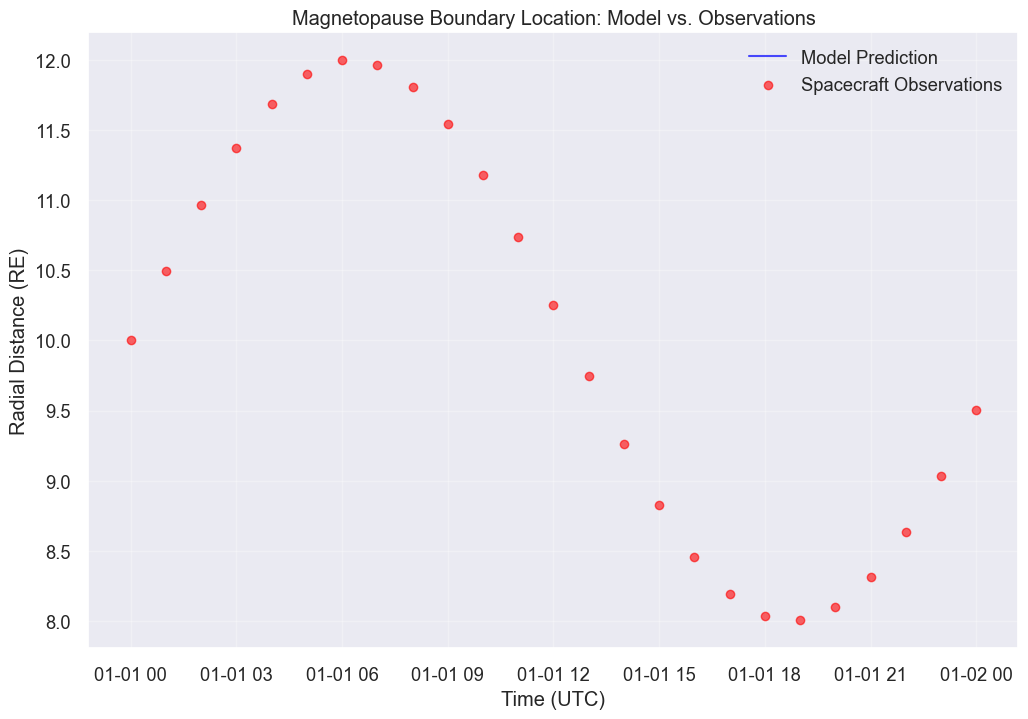

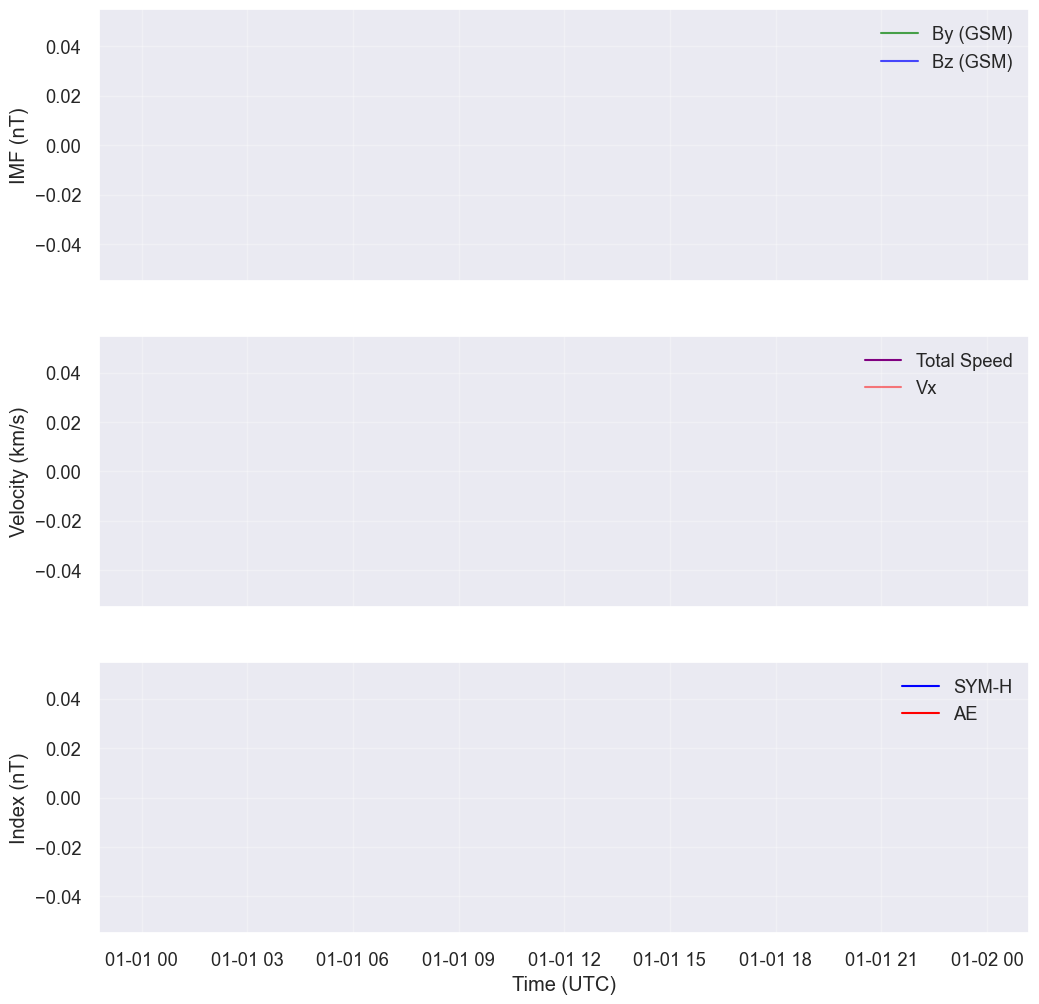


Analysis Statistics:
--------------------------------------------------
Time period: 2000-01-01 00:00:00 to 2012-01-02 00:00:00
Number of data points: 6312960

Solar Wind Statistics:
             BY_GSM        BZ_GSM            Vx            Vy            Vz  \
count  6.312960e+06  6.312960e+06  6.312960e+06  6.312960e+06  6.312960e+06   
mean   6.309810e+02  6.310376e+02  1.679133e+04  1.715617e+04  1.715591e+04   
std    2.431431e+03  2.431415e+03  3.786798e+04  3.770182e+04  3.770194e+04   
min   -5.094000e+01 -6.059000e+01 -1.136500e+03 -8.649000e+02 -3.104000e+02   
25%   -2.460000e+00 -1.630000e+00 -4.825000e+02 -1.360000e+01 -1.190000e+01   
50%    2.800000e-01  2.800000e-01 -3.937000e+02  1.400000e+00  2.800000e+00   
75%    3.150000e+00  2.380000e+00 -3.191000e+02  3.040000e+01  2.590000e+01   
max    9.999990e+03  9.999990e+03  9.999990e+04  9.999990e+04  9.999990e+04   

           AE_INDEX         SYM_H    flow_speed  
count  6.312960e+06  6.312960e+06  6.312960e+06  
mean

In [2]:
# Cell 1: Install required packages
# !pip install hapiclient requests pandas numpy matplotlib seaborn

# Cell 2: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from hapiclient import hapi
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn')
sns.set_context("notebook", font_scale=1.2)

# Cell 3: Data Retrieval Class
class MagnetosphereDataRetriever:
    def __init__(self):
        self.server = 'https://cdaweb.gsfc.nasa.gov/hapi'
        self.dataset = 'OMNI_HRO_1MIN'
        
    def get_solar_wind_data(self, start_time, end_time):
        """
        Retrieve OMNI solar wind data using HAPI client
        """
        try:
            # Define parameters
            parameters = ['BY_GSM', 'BZ_GSM', 'Vx', 'Vy', 'Vz', 'AE_INDEX', 'SYM_H']
            parameters_string = ','.join(parameters)
            # Convert times to ISO format
            start = start_time.strftime('%Y-%m-%dT%H:%M:%SZ')
            end = end_time.strftime('%Y-%m-%dT%H:%M:%SZ')
            
            # Retrieve data
            print("Fetching data from HAPI server...")
            data, meta = hapi(self.server, self.dataset, parameters_string, start, end)
            
            # Convert the numpy array to a DataFrame with column names from 'meta'
            column_names = [param['name'] for param in meta['parameters']]
            df = pd.DataFrame(data, columns=column_names)
            
            # Calculate total velocity
            df['flow_speed'] = np.sqrt(df['Vx']**2 + df['Vy']**2 + df['Vz']**2)
            
            # Convert 'Time' to datetime and set as index
            # df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
            # df.set_index('Time', inplace=True)
            
            return df
            
        except Exception as e:
            print(f"Error retrieving data: {str(e)}")
            raise Exception("Failed to retrieve solar wind data")

def process_spacecraft_data(raw_data_path):
    """Process spacecraft boundary data"""
    try:
        # Read the data file - modify format as needed
        df = pd.read_csv(raw_data_path, parse_dates=['timestamp'])
        df.set_index('timestamp', inplace=True)
        return df
    except Exception as e:
        print(f"Error processing spacecraft data: {str(e)}")
        # Generate sample data for testing
        dates = pd.date_range(start='2012-01-01', end='2012-01-02', freq='1H')
        boundary_distance = 10 + 2 * np.sin(2 * np.pi * np.arange(len(dates)) / len(dates))
        return pd.DataFrame({'boundary_distance': boundary_distance}, index=dates)

def calculate_magnetopause_location(solar_wind_df):
    """Calculate magnetopause location using Shue et al. 1998 model"""
    def shue_model(Bz, V):
        # Calculate dynamic pressure from velocity
        Dp = 1.6726e-6 * 5 * V**2  # Assuming typical density of 5 cm^-3
        
        alpha = (0.58 - 0.007 * Bz) * (1 + 0.024 * np.log(Dp))
        R0 = (10.22 + 1.29 * np.tanh(0.184 * (Bz + 8.14))) * Dp ** (-1/6.6)
        return R0, alpha
    
    # Use GSM Bz and total flow speed
    Bz = pd.to_numeric(solar_wind_df['BZ_GSM'], errors='coerce')
    V = pd.to_numeric(solar_wind_df['flow_speed'], errors='coerce')
    
    # Replace invalid values with interpolated ones
    Bz = Bz.interpolate(method='linear')
    V = V.interpolate(method='linear')
    
    R0, alpha = shue_model(Bz, V)
    return pd.DataFrame({'R0': R0, 'alpha': alpha}, index=solar_wind_df.index)

# Cell 4: Visualization Functions
def plot_boundary_comparison(model_data, spacecraft_data):
    """Plot predicted vs. observed boundary locations"""
    plt.figure(figsize=(12, 8))
    
    # Plot model prediction
    plt.plot(model_data.index, model_data['R0'], 
             label='Model Prediction', color='blue', alpha=0.7)
    
    # Plot spacecraft observations
    plt.scatter(spacecraft_data.index, spacecraft_data['boundary_distance'],
               label='Spacecraft Observations', color='red', alpha=0.6)
    
    plt.xlabel('Time (UTC)')
    plt.ylabel('Radial Distance (RE)')
    plt.title('Magnetopause Boundary Location: Model vs. Observations')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

def plot_solar_wind_conditions(solar_wind_df):
    """Plot solar wind parameters"""
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
    
    # IMF components
    ax1.plot(solar_wind_df.index, solar_wind_df['BY_GSM'], 
             label='By (GSM)', color='green', alpha=0.7)
    ax1.plot(solar_wind_df.index, solar_wind_df['BZ_GSM'], 
             label='Bz (GSM)', color='blue', alpha=0.7)
    ax1.set_ylabel('IMF (nT)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Solar wind velocity
    ax2.plot(solar_wind_df.index, solar_wind_df['flow_speed'], 
             label='Total Speed', color='purple')
    ax2.plot(solar_wind_df.index, solar_wind_df['Vx'], 
             label='Vx', color='red', alpha=0.5)
    ax2.set_ylabel('Velocity (km/s)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Geomagnetic indices
    ax3.plot(solar_wind_df.index, solar_wind_df['SYM_H'], 
             label='SYM-H', color='blue')
    ax3.plot(solar_wind_df.index, solar_wind_df['AE_INDEX'], 
             label='AE', color='red')
    ax3.set_ylabel('Index (nT)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.xlabel('Time (UTC)')
    return fig

# Cell 5: Run Analysis
# Initialize data retriever
retriever = MagnetosphereDataRetriever()

# Set time range (adjust as needed)
start_time = datetime(2000, 1, 1)  # Modify this to your desired start time
end_time = datetime(2012, 1, 2)    # Modify this to your desired end time

# Get solar wind data
print("Retrieving solar wind data...")
solar_wind_data = retriever.get_solar_wind_data(start_time, end_time)
print("Solar wind data retrieved successfully!")

# Process spacecraft data
print("Processing spacecraft data...")
spacecraft_data = process_spacecraft_data('your_spacecraft_data.csv')
print("Spacecraft data processed!")

# Calculate model prediction
print("Calculating magnetopause location...")
model_output = calculate_magnetopause_location(solar_wind_data)
print("Calculations complete!")

# Create visualizations
print("Creating plots...")
boundary_plot = plot_boundary_comparison(model_output, spacecraft_data)
solar_wind_plot = plot_solar_wind_conditions(solar_wind_data)

# Display plots
plt.show()

# Cell 6: Analysis Statistics
print("\nAnalysis Statistics:")
print("-" * 50)
print(f"Time period: {start_time} to {end_time}")
print(f"Number of data points: {len(solar_wind_data)}")
print("\nSolar Wind Statistics:")
print(solar_wind_data.describe())
print("\nMagnetopause Statistics:")
print(model_output.describe())

This is just a test of the data retrieval services of the HAPI client

In [3]:
# Set time range (adjust as needed)
start_time = datetime(1983, 12, 1)  # Year, month, Day format
end_time = datetime(2012, 12, 31)    # End date

# Get solar wind data
print("Retrieving solar wind data...")
solar_data = retriever.get_solar_wind_data(start_time, end_time)
print("Solar wind data retrieved successfully!")
solar_data.describe()

Retrieving solar wind data...
Fetching data from HAPI server...
Solar wind data retrieved successfully!


,BY_GSM,BZ_GSM,Vx,Vy,Vz,AE_INDEX,SYM_H,flow_speed
count,1.529712e+07,1.529712e+07,1.529712e+07,1.529712e+07,1.529712e+07,1.529712e+07,1.529712e+07,1.529712e+07
mean,3.175241e+03,3.175249e+03,4.245273e+04,4.270046e+04,4.270078e+04,5.067891e+03,-1.400806e+01,7.421124e+04
std,4.655133e+03,4.655128e+03,4.967945e+04,4.946553e+04,4.946525e+04,2.149451e+04,2.212826e+01,8.545940e+04
min,-5.094000e+01,-6.059000e+01,-1.136500e+03,-8.649000e+02,-3.104000e+02,1.000000e+00,-7.200000e+02,1.806830e+02
25%,-1.530000e+00,-9.400000e-01,-4.269000e+02,-7.700000e+00,-4.200000e+00,5.100000e+01,-2.200000e+01,3.979528e+02
50%,2.530000e+00,1.780000e+00,-3.288000e+02,2.350000e+01,2.160000e+01,1.250000e+02,-1.000000e+01,5.694255e+02
75%,9.999990e+03,9.999990e+03,9.999990e+04,9.999990e+04,9.999990e+04,3.190000e+02,-1.000000e+00,1.732049e+05
max,9.999990e+03,9.999990e+03,9.999990e+04,9.999990e+04,9.999990e+04,9.999900e+04,1.510000e+02,1.732049e+05


In [4]:
solar_data.head()

,BY_GSM,BZ_GSM,Vx,Vy,Vz,AE_INDEX,SYM_H,flow_speed
Time,,,,,,,,
NaT,9999.99,9999.99,99999.9,99999.9,99999.9,228,-24,173204.907552
NaT,9999.99,9999.99,99999.9,99999.9,99999.9,242,-24,173204.907552
NaT,9999.99,9999.99,99999.9,99999.9,99999.9,214,-24,173204.907552
NaT,9999.99,9999.99,99999.9,99999.9,99999.9,196,-25,173204.907552
NaT,9999.99,9999.99,99999.9,99999.9,99999.9,222,-26,173204.907552


15290000.0
